# 1. lab aeration tank description  
The lab aeration tank is modelled as n CSTR in series  
Assume n=4 
(n=1 is a well-mixed tank; n=12 is a plug-flow tank.)  
The volume of the tank is 400L  
The hydraulic retention time，HRT=16h=960min
The flow rate, Q=25L/h  
The aeration rate is constant  


For each stage:  
the volume is 100L  
the hydraulic retention time is 4h(240min)  


Assume the infulent of the tank:  
BOD: 160 mg/L  
DO: 8.25mg/L  
MLSS: 0mg/L


The DO sensor is assumed to be placed at stage 1, as generally, the DO is lowest at stage 1.  (might be chaged later based on the experimental data)  
The BOD sensor is place at the effluent (last stage).  
As sludge retention time is longer than HRT, the MLSS can be considered as well mixed in the whole tank.   


# 2. Kinetic equations  

MLSS: $$\frac{dMLSS}{dt} = \frac{Q}{V}*(MLSS_{in}-MLSS_{out})+\mu*\frac{S_{BOD}}{K_{BOD}+S_{BOD}}*\frac{S_{O_2}}{K_{O_2}+S_{O_2}}*MLSS-kd*MLSS$$  
BOD: $$\frac{dBOD}{dt} = \frac{Q}{V}*(BOD_{in}-BOD_{out})-\frac{\mu}{Y}*f\frac{S_{BOD}}{K_{BOD}+S_{BOD}}*\frac{S_{O_2}}{K_{O_2}+S_{O_2}}*MLSS$$
DO: $$\frac{dDO}{dt} = \frac{Q}{V}*(DO_{in}-DO_{out})-\frac{\mu}{Y}*\frac{S_{BOD}}{K_{BOD}+S_{BOD}}*\frac{S_{O_2}}{K_{O_2}+S_{O_2}}*MLSS+K_{L}a*(CS-S_{O_2})$$  

µ, maximum gross growth rate, day$^{-1}$  
kd, death rate, day$^{-1}$  
kla, day$^{-1}$  

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#kbod, BOD saturation constant, mg/L
kbod=20
#ko2,oxygen saturation constant, mg/L
ko2=0.1
#Y, growth yield coefficient, g cell/g BOD
Y=1.1
#µ, maximum gross growth rate,/day
µ=6
#kd, death rate,/day
kd=0.1
#kla,/day
kla=50
#CS,Saturated DO concentration,mg/L
CS=9

# Inflow condition, mg/L
inflowMLSS=0
inflowBOD=160
inflowDO=8.25

# Initial condition of the tank, mg/L
initialMLSS=100
initialBOD=100
initialDO=8.25

#number of each stages
n=4
#the hydraulic retention time is 16h(960 min)
T=960
#The volume of the tank is 400L
V=400
#The volume of each stage
v=400/n
#flow rate L/min
q=V/T
#The volume of the tank is 400L
#operation time, min
t=1440
#delt,1min
delt=1
#The integral steps
i=int(t/delt)

conc=np.zeros((i,n,3))
conc[0]=[initialMLSS,initialBOD,initialDO]

delreac=np.zeros((n,3))
delaero=np.zeros((n,3))
deltran=np.zeros((n,3))

j=0
while j<i-1:

    k=0
    while k<n:
#concentration changes by microorganisms reaction in delt.
        delreac[k]=delt/1440*np.array([µ*(conc[j,k,1]/(kbod+conc[j,k,1]))*(conc[j,k,2]/(ko2+conc[j,k,2]))*conc[j,k,0]-kd*conc[j,k,0],
                             -µ/Y*(conc[j,k,1]/(kbod+conc[j,k,1]))*(conc[j,k,2]/(ko2+conc[j,k,2]))*conc[j,k,0],
                             -µ/Y*(conc[j,k,1]/(kbod+conc[j,k,1]))*(conc[j,k,2]/(ko2+conc[j,k,2]))*conc[j,k,0]])
#DO concentration changes by aerotion.
        delaero[k]=delt/1440*np.array([0,0,kla*(CS-conc[j,k,2])])
        k=k+1
    deltran=q*delt/v*np.array([[inflowMLSS-conc[j,0,0],inflowBOD-conc[j,0,1],inflowDO-conc[j,0,2]],
                              [conc[j,0,0]-conc[j,1,0],conc[j,0,1]-conc[j,1,1],conc[j,0,2]-conc[j,1,2]],
                              [conc[j,1,0]-conc[j,2,0],conc[j,1,1]-conc[j,2,1],conc[j,1,2]-conc[j,2,2]],
                              [conc[j,2,0]-conc[j,3,0],conc[j,2,1]-conc[j,3,1],conc[j,2,2]-conc[j,3,2]]])
    delconc=delreac+delaero+deltran   
    conc[j+1]=conc[j]+delconc
    j=j+1
                             
print(conc)

[[[100.         100.           8.25      ]
  [100.         100.           8.25      ]
  [100.         100.           8.25      ]
  [100.         100.           8.25      ]]

 [[ 99.91945276  99.93812375   7.96416542]
  [100.33611943  99.68812375   7.96416542]
  [100.33611943  99.68812375   7.96416542]
  [100.33611943  99.68812375   7.96416542]]

 [[ 99.83878777  99.87692256   7.68986386]
  [100.67130531  99.37653835   7.68750483]
  [100.67304142  99.37549668   7.68750483]
  [100.67304142  99.37549668   7.68750483]]

 ...

 [[ 31.92054288 130.47860589   6.22076546]
  [114.3159737   54.0889806    1.18542605]
  [162.79005773   8.72908464   3.52988673]
  [171.35690152   1.02331627   7.6335714 ]]

 [[ 31.8988244  130.49842944   6.22253955]
  [114.28540548  54.11573917   1.18621447]
  [162.77719298   8.73588832   3.52785675]
  [171.34361071   1.02423805   7.63273256]]

 [[ 31.8771235  130.51823805   6.22431229]
  [114.25484989  54.14249282   1.18700359]
  [162.76434507   8.7426936    3.52582

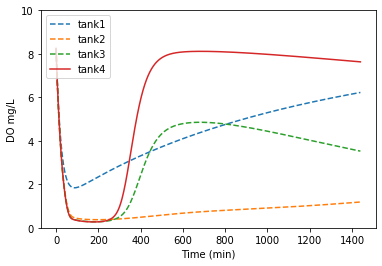

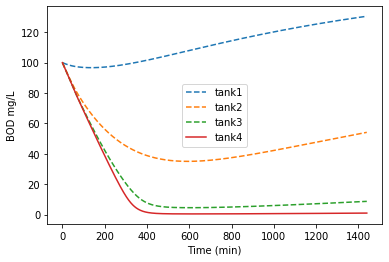

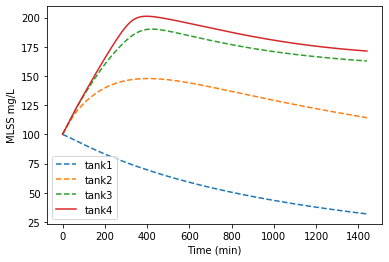

After 24.0 hours operation, in the effluent:
DO = 7.631893626976409 mg/L
BOD = 1.025160074127154 mg/L
MLSS= 171.3303492746386 mg/L


In [40]:
timerange=np.linspace(0,t,i)
tank1=np.array(conc[:,0])
tank2=np.array(conc[:,1])
tank3=np.array(conc[:,2])
tank4=np.array(conc[:,3])
plt.figure(1)
line = plt.plot(timerange, np.array(tank1[:,2]), '--', label='tank1')
line = plt.plot(timerange, np.array(tank2[:,2]), '--', label='tank2')
line = plt.plot(timerange, np.array(tank3[:,2]), '--', label='tank3')
line = plt.plot(timerange, np.array(tank4[:,2]), '-', label='tank4')
plt.ylim([0,10])
plt.legend()
plt.ylabel('DO mg/L')
plt.xlabel('Time (min)')
plt.show()
plt.figure(2)
line = plt.plot(timerange, np.array(tank1[:,1]), '--', label='tank1')
line = plt.plot(timerange, np.array(tank2[:,1]), '--', label='tank2')
line = plt.plot(timerange, np.array(tank3[:,1]), '--', label='tank3')
line = plt.plot(timerange, np.array(tank4[:,1]), '-', label='tank4')
plt.legend()
plt.ylabel('BOD mg/L')
plt.xlabel('Time (min)')
plt.show()
plt.figure(3)
line = plt.plot(timerange, np.array(tank1[:,0]), '--', label='tank1')
line = plt.plot(timerange, np.array(tank2[:,0]), '--', label='tank2')
line = plt.plot(timerange, np.array(tank3[:,0]), '--', label='tank3')
line = plt.plot(timerange, np.array(tank4[:,0]), '-', label='tank4')
plt.legend()
plt.ylabel('MLSS mg/L')
plt.xlabel('Time (min)')
plt.show()
print('After',t/60,'hours operation, in the effluent:')
print('DO =',conc[-1,3,2],'mg/L')
print('BOD =',conc[-1,3,1],'mg/L')
print('MLSS=',conc[-1,3,0],'mg/L')